**Heart diseaases**

Cardiovascular (heart and blood vessel) diseases (CVD) affects millions of people each year. CVDs are a group of disorders of the heart and blood vessels. They include coronary heart disease, cerebrovascular disease, peripheral arterial disease, rheumatic heart disease, congenital heart disease, deep vein thrombosis and pulmonary embolism.

The most important behavioral risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

Cessation of tobacco use, reduction of salt in the diet, eating more fruit and vegetables, regular physical activity and avoiding harmful use of alcohol have been shown to reduce the risk of cardiovascular disease. In addition, drug treatment of hypertension, diabetes and high blood lipids are necessary to reduce cardiovascular risk and prevent heart attacks and strokes among people with these conditions.

In this assignment we will performed an exploratory data analysis on "Heart disease dataset", downloaded from Kaggle.

**About the data set**

Heart disease dataset has 270 rows and 14 columns. First 13 columns provide the different parameters and 14th column is the target column indicate the presence or absence of heart disease. Column parameters are described below:
1. age       
2. sex (1=male; 2=female)       
3. chest pain type        
4. resting blood pressure  
5. serum cholesterol in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved  
9. exercise induced angina    
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by fluoroscopy        
13. thal (thallium scan): 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target (Absence (1) or presence (2) of heart disease)

Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load the dataset

In [2]:
data=pd.read_csv("dataset_heart.csv")

In [3]:
data.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

The column ("sex ") contains one extra space. Rename this column to "sex".

In [4]:
df=data.rename({'sex ':'sex'}, axis=1)
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

Explore the dataset

In [5]:
df.shape

(270, 14)

In [6]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [7]:
df.tail()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [8]:
df.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

Check the missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

There are no null values.

Check the patient count

To check the patient count, I used the value_counts function. This will provide the count of male and female patient.

In [11]:
print(df['sex'].value_counts())

sex
1    183
0     87
Name: count, dtype: int64


Check the count of patients with heart disease

In [12]:
print(df['heart disease'].value_counts())

heart disease
1    150
2    120
Name: count, dtype: int64


Total 120 patients have heart disease.

In [13]:
pd.crosstab(df['sex'], df['heart disease']) # check the gender wise presence of heart disease

heart disease,1,2
sex,,
0,67,20
1,83,100


# **Identificartion of outliers in non-categorical variable**

{'whiskers': [<matplotlib.lines.Line2D at 0x7d642c125750>,
 'caps': [<matplotlib.lines.Line2D at 0x7d642da29660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d642c125000>],
 'medians': [<matplotlib.lines.Line2D at 0x7d642da29420>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d642da2ace0>],
 'means': []}

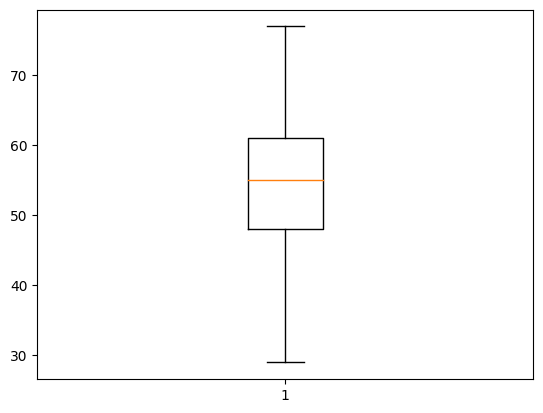

In [29]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d642df878e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6431f3b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d642df87cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6431f39ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6431f395a0>],
 'means': []}

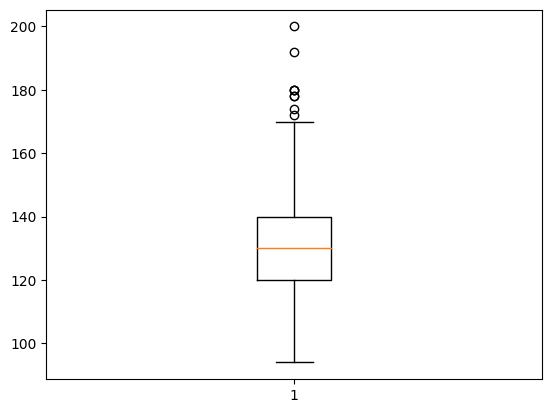

In [30]:
plt.boxplot(df['resting blood pressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d642e0ebe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d642d1f5780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d642db1a830>],
 'medians': [<matplotlib.lines.Line2D at 0x7d642df6c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d642df6c2b0>],
 'means': []}

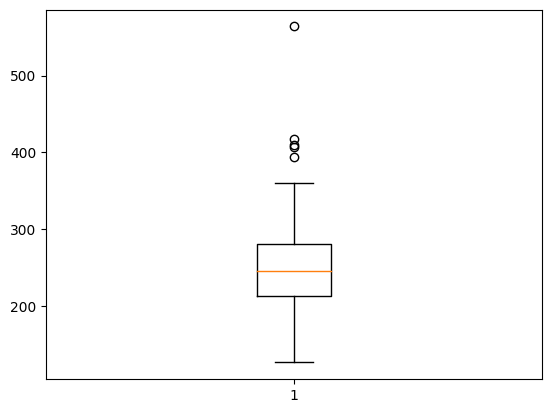

In [32]:
plt.boxplot(df['serum cholestoral'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d642d0a7100>,
 'caps': [<matplotlib.lines.Line2D at 0x7d642d0a6650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d642d0a5ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d642d0a6a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d642d0a5180>],
 'means': []}

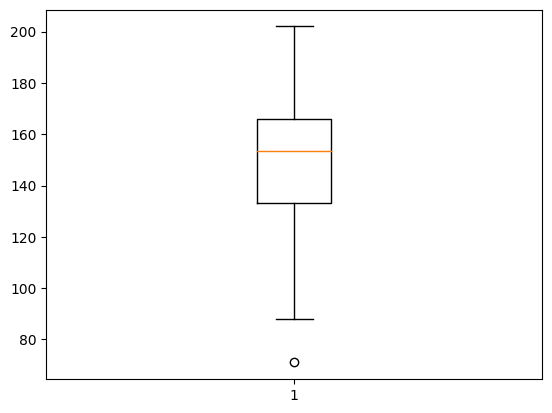

In [33]:
plt.boxplot(df['max heart rate'])

# **Correlation between non-categorical variable**

I use the scatterplot function to find the correlation between non-categorical variable.

There is no specific correlation observed between these variables; however, maximum heart rate observed to be decreased with increase in age.

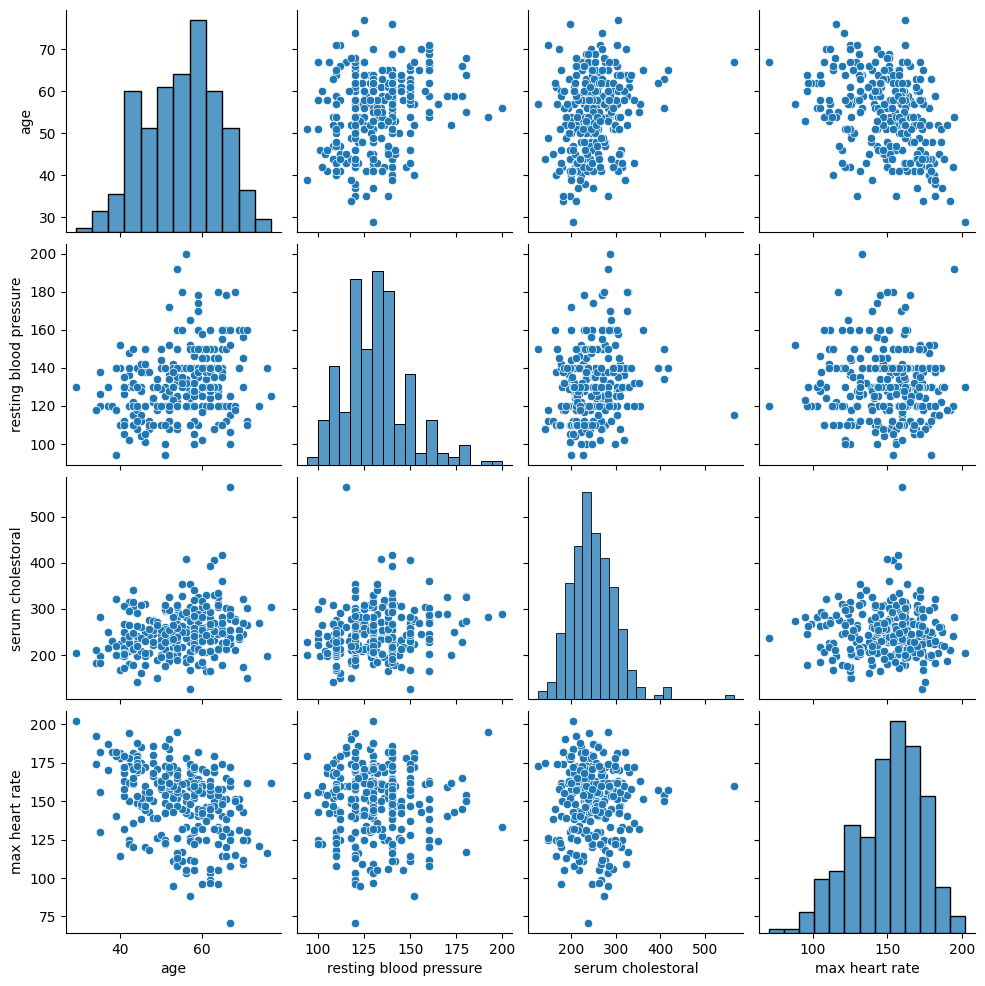

In [14]:
sns.pairplot(df[['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate']])

# **Presence of heart disease based on age**

Filter the data where heart disease is present

In [15]:
df_hd=df[df['heart disease']==2] #filter the data where heart disease is present
df_hd_age=df_hd['age'].value_counts() # check the number of heart disease cases in reported age group
print(df_hd_age)

age
58    10
60     9
59     7
62     7
56     6
61     6
54     6
67     5
57     5
65     4
63     4
64     4
55     4
66     3
52     3
51     3
70     3
46     3
50     3
48     3
44     2
35     2
43     2
53     2
47     2
40     2
49     2
45     1
42     1
38     1
69     1
41     1
77     1
39     1
68     1
Name: count, dtype: int64


Visualize the above result using histogram.

From the histogram, we can observe that ***majority of patients had heart disease between age of 55 to 65.*** Therefore, chances of presence of heart disease increases as the age increases.

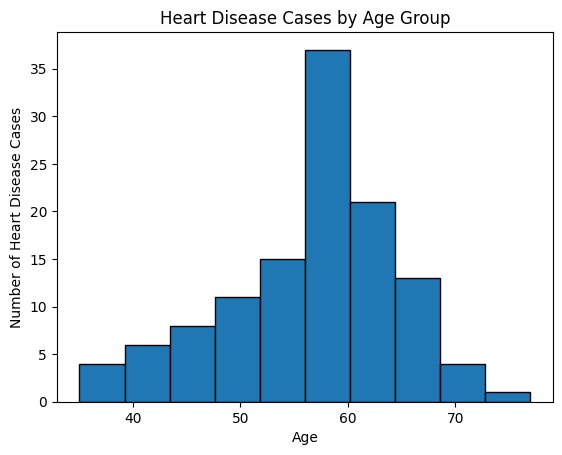

In [16]:
plt.hist(df_hd['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Heart Disease Cases')
plt.title('Heart Disease Cases by Age Group')
plt.show()

# **Resting BP v/s number of heart disease**

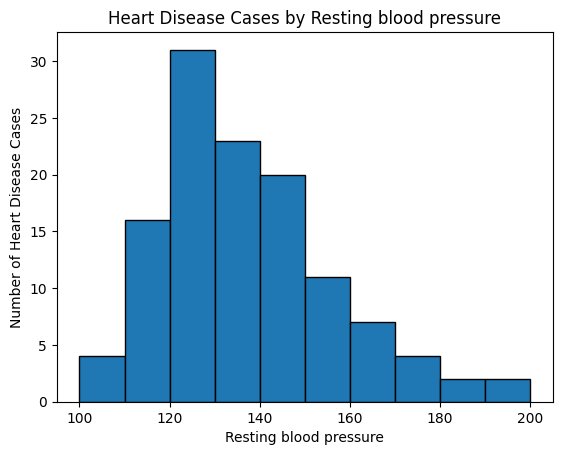

In [22]:
plt.hist(df_hd['resting blood pressure'], bins=10, edgecolor='black')
plt.xlabel('Resting blood pressure')
plt.ylabel('Number of Heart Disease Cases')
plt.title('Heart Disease Cases by Resting blood pressure')
plt.show()

It can be observed from the above chart that resting BP from 120 to 150 has high count of heart diseases.

# **Serum cholestoral v/s heart disease**

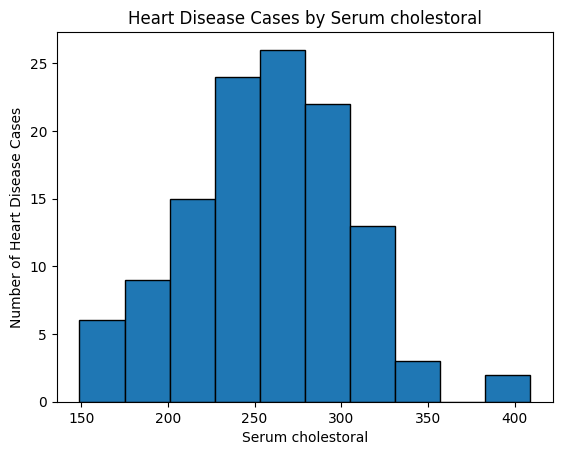

In [25]:
plt.hist(df_hd['serum cholestoral'], bins=10, edgecolor='black')
plt.xlabel('Serum cholestoral')
plt.ylabel('Number of Heart Disease Cases')
plt.title('Heart Disease Cases by Serum cholestoral')
plt.show()

It can be observed from the above chart that serum cholesterol level from 225 to 300 has high count of heart diseases. Therefore, risk of presence od heart disease increases with increase in serum cholesterol level.

Max heart rate v/s heart disease

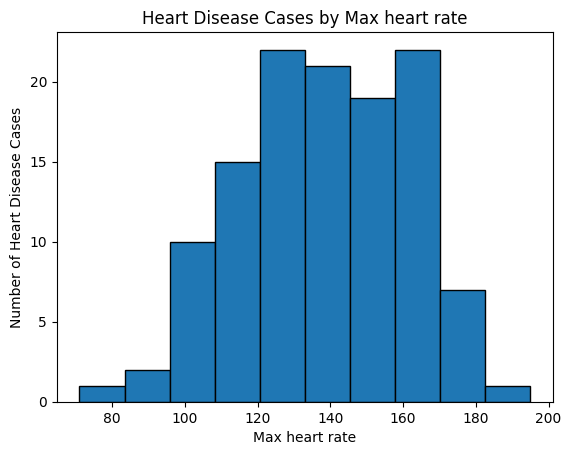

In [26]:
plt.hist(df_hd['max heart rate'], bins=10, edgecolor='black')
plt.xlabel('Max heart rate')
plt.ylabel('Number of Heart Disease Cases')
plt.title('Heart Disease Cases by Max heart rate')
plt.show()

It can be observed from tha above chart that max HR of >120 has high count of cases. Therefore, there are more chances of presence of heart disease in patients with max heart rate of >120.